In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

from IPython.display import display, Math

In [20]:
#Data from Краткий Справочник Физико-Химических величин (А.А. Равделя) table 10, pg 26
x2 = np.array([i for i in range(0,105,5)])/100     #мольная доля компонента 2 (ацетон)
p1 = np.array([23.7, 22.3, 21.3, 20.5, 20, 20,19.7, 19.4, 19, 18.5, 18,17.5, 16.5, 15.5, 14.5, 13, 11.2, 9, 6.5, 3.5,0])  # Парциальное давление воды
p2 = np.array([0, 67, 110, 129, 141, 150, 157, 164, 169, 174, 178, 182, 186, 189, 194, 198, 203, 207, 213, 221, 229.3])   # Парциальное давление ацетона

In [3]:
#Давдение читстых компонентов
p1_stand = p1[0]
p2_stand = p2[-1]

#общее давление 
p_total = p1+p2 

#Парцияальные и общие давление в соответствии с законом Рауля
p1_raul = p1[0]*(1-x2)  
p2_raul = p2[-1]*x2
P_raul = p1_raul+ p2_raul

#Мольная доля 2го компонента (ацетон) в паре
x2_gas = p2/(p1+p2)

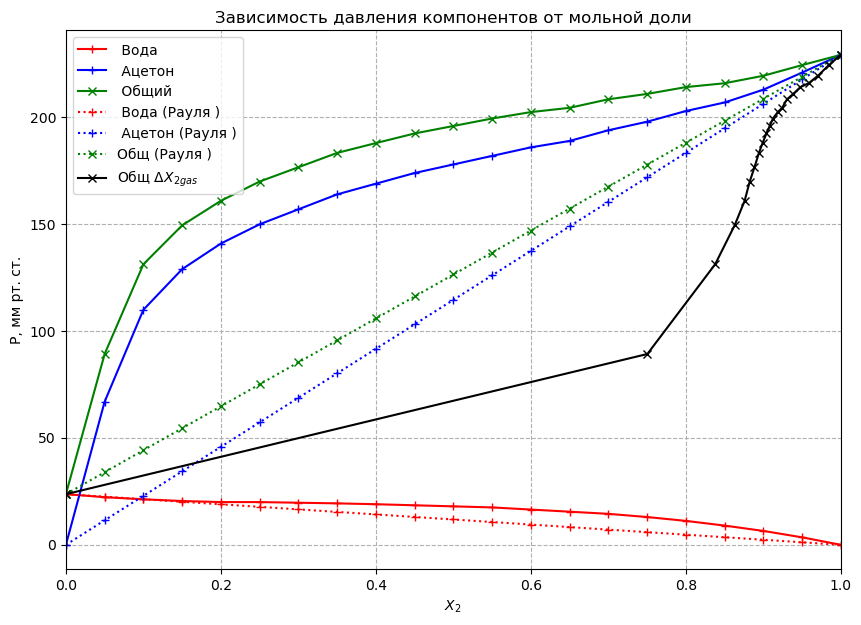

In [6]:
#Рисунок 1
matplotlib.rcParams['figure.figsize'] = (10,7)
plt.grid(linestyle = '--')
plt.plot(x2, p1, marker = '+', c='r', label=' Вода '   )
plt.plot(x2, p2, marker = '+', c='b', label=' Ацетон '  )
plt.plot(x2, p_total, marker = 'x', c='g', label=' Общий ' )

plt.plot(x2, p1_raul, marker = '+', c='r', label=' Вода (Рауля )' ,linestyle = 'dotted' )
plt.plot(x2, p2_raul, marker = '+', c='b', label=' Ацетон (Рауля )' ,linestyle = 'dotted' )
plt.plot(x2, P_raul, marker = 'x', c='g', label='Общ (Рауля ) ' ,linestyle = 'dotted' )

plt.plot(x2_gas, p_total, marker = 'x', c='k', label='Общ ' + '$\Delta$'+ r'${X_{2gas}}$' )

plt.title('Зависимость давления компонентов от мольной доли')
plt.xlabel(r'$X_2$ ') 
plt.ylabel( 'P, мм рт. ст.')
plt.legend()
plt.xlim(0, 1)
plt.savefig('Зависимость давления компонентов от мольной доли.png', dpi=300)

In [4]:
#Активность и коэффиуиент активности 
a1 = p1/p1_stand
a2 = p2/p2_stand

gamma1 = a1/(1-x2)
gamma2 = a2/x2

C:\Users\Brian\AppData\Local\Temp\ipykernel_12736\1690360898.py:5: RuntimeWarning: invalid value encountered in divide
  gamma1 = a1/(1-x2)
C:\Users\Brian\AppData\Local\Temp\ipykernel_12736\1690360898.py:6: RuntimeWarning: invalid value encountered in divide
  gamma2 = a2/x2


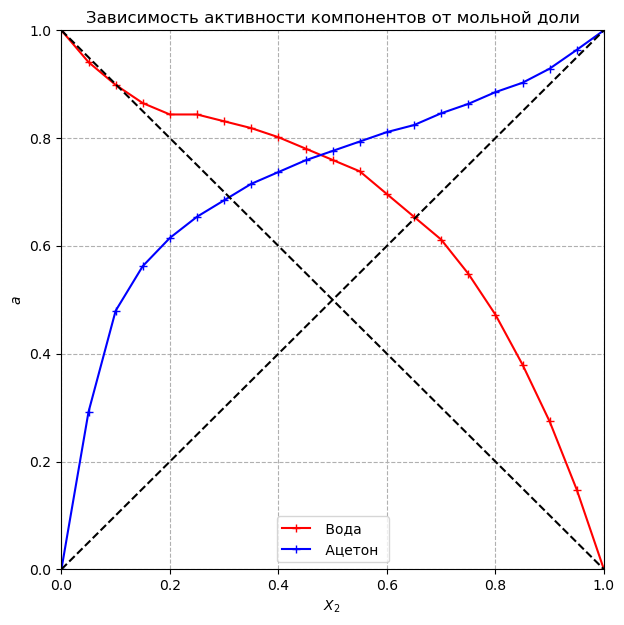

In [15]:
#Рисунок 2 
matplotlib.rcParams['figure.figsize'] = (7,7)
plt.grid(linestyle = '--')
plt.plot(x2, a1, marker = '+', c='r', label=' Вода '  )
plt.plot(x2, a2, marker = '+', c='b', label=' Ацетон ' )
plt.plot(x2, x2, c='k' , linestyle = 'dashed')
plt.plot(x2, 1-x2, c='k' , linestyle = 'dashed')
plt.title('Зависимость активности компонентов от мольной доли')
plt.xlabel(r'$X_2$ ') 
plt.ylabel( r'$a$ ')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.savefig('Зависимость активности компонентов от мольной доли.png', dpi=300)

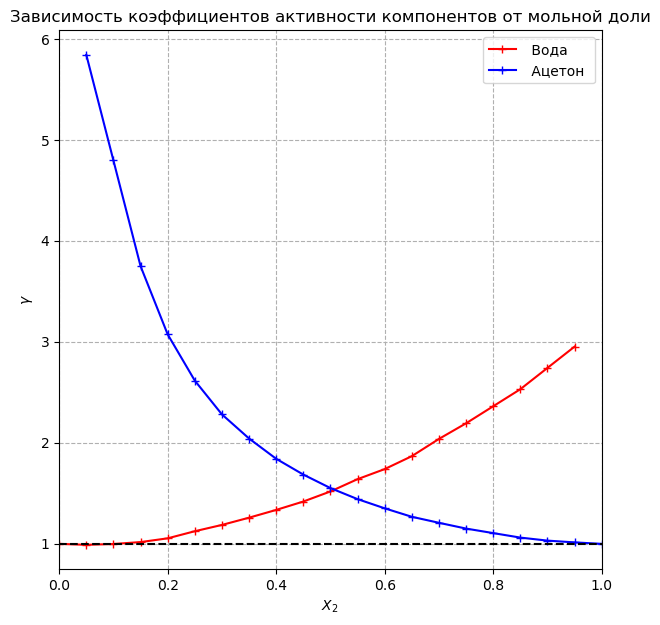

In [5]:
#Рисунок 3 
matplotlib.rcParams['figure.figsize'] = (7,7)
plt.grid(linestyle = '--')
plt.plot(x2, gamma1, marker = '+', c='r', label=' Вода '   )
plt.plot(x2, gamma2, marker = '+', c='b', label=' Ацетон ' )
plt.axhline(y = 1,  c='k' , linestyle = 'dashed') 

plt.title('Зависимость коэффициентов активности компонентов от мольной доли')
plt.xlabel(r'$X_2$ ') 
plt.ylabel( r'$\gamma$ ')
plt.xlim(0, 1)
plt.legend()
plt.savefig('Зависимость коэффициентов активности компонентов от мольной доли.png', dpi=300)

In [6]:
#Относительные химическиые потенциалы и мольная энергия Гиббса при temperature = 25C
chem_potn1 = 8.314*(25+273.15)*np.log(a1)
chem_potn2 = 8.314*(25+273.15)*np.log(a2)
Gibbs_M = 8.314*(25+273.15)*((1-x2)*np.log(a1) + x2*np.log(a2))
Gibbs_M[0], Gibbs_M[-1] = 0,0 

C:\Users\Brian\AppData\Local\Temp\ipykernel_12736\3973584941.py:2: RuntimeWarning: divide by zero encountered in log
  chem_potn1 = 8.314*(25+273.15)*np.log(a1)
C:\Users\Brian\AppData\Local\Temp\ipykernel_12736\3973584941.py:3: RuntimeWarning: divide by zero encountered in log
  chem_potn2 = 8.314*(25+273.15)*np.log(a2)
C:\Users\Brian\AppData\Local\Temp\ipykernel_12736\3973584941.py:4: RuntimeWarning: divide by zero encountered in log
  Gibbs_M = 8.314*(25+273.15)*((1-x2)*np.log(a1) + x2*np.log(a2))
C:\Users\Brian\AppData\Local\Temp\ipykernel_12736\3973584941.py:4: RuntimeWarning: invalid value encountered in multiply
  Gibbs_M = 8.314*(25+273.15)*((1-x2)*np.log(a1) + x2*np.log(a2))


[-552.05534264] [-716.69222689]


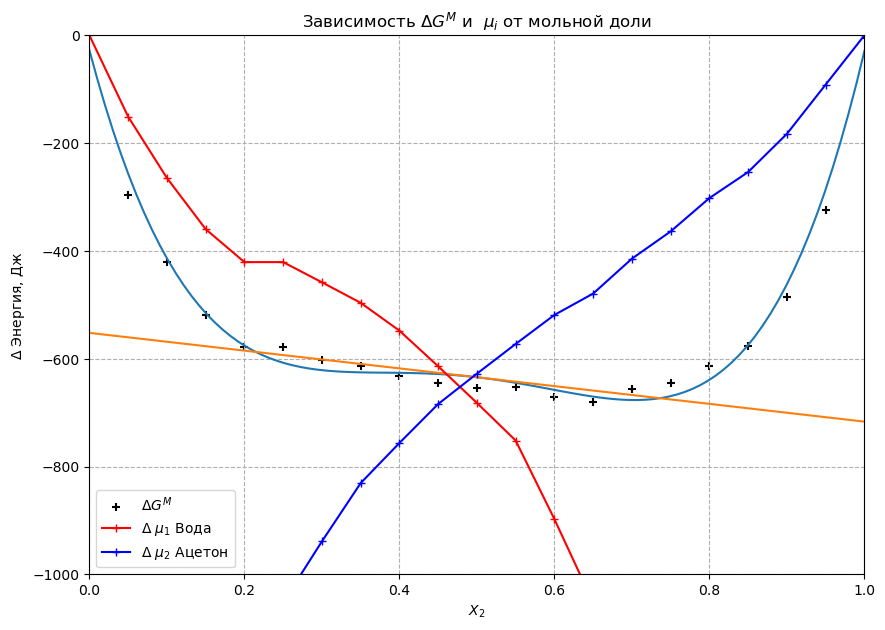

In [18]:
#Рисунок 3 
matplotlib.rcParams['figure.figsize'] = (10,7)
plt.grid(linestyle = '--')

#Интерполяция Мольной Энергии Гиббса от мольной доли 2го компонента в жидкости 
z2 = np.polyfit(x2, Gibbs_M, 4)
mymodel2 = np.poly1d(z2)
xs2 = np.linspace(0, 1, 100)
plt.plot(xs2, mymodel2(xs2) , )

#Функция получена из интреполяции
def Hm_(x):
    return (z2[0]*x**4 + z2[1]*x**3 + z2[2]*x**2 + z2[3]*x + z2[4])

#производная Функуии (дасть значение m при данном Х2)
def Hm_dev(x):
    return 4*z2[0]*x**3 + 3*z2[1]*x**2 + 2*z2[2]*x + z2[3]
y_0 = []
y_1 = []

#Определение значених хим пот графическим методом отрезков
def tangent(xb, m):
    xs3 = np.linspace(xb-1, xb+1, 100)
    y = (m)*(xs3- xb) + (Hm_(xb))  # y-y1 = m(x-x1)   then Y = m(x-x1)+y1
    y_0 = (m)*(0- xb) + (Hm_(xb))  # y for x2=0
    y_1 = (m)*(1- xb) + (Hm_(xb))  # y for x2=1
    print(y_0, y_1)
    plt.plot(xs3, y , )     
    return y_0, y_1

y_0, y_1 = tangent(x, Hm_dev(0.5))   # 0.5 это мольная доля ацетона 

plt.scatter(x2, Gibbs_M, marker = '+', c='k', label= '$\Delta$' r'$G^M  $'   )
plt.plot(x2, chem_potn1, marker = '+', c='r', label= '$\Delta$' ' $\mu_1$'' Вода '   )
plt.plot(x2, chem_potn2, marker = '+', c='b', label= '$\Delta$' ' $\mu_2$'' Ацетон '   )

plt.title('Зависимость ' '$\Delta$' r'$G^M  $' ' и ' ' $\mu_i$'' от мольной доли')
plt.xlabel(r'$X_2$ ') 
plt.ylabel( r'$\Delta$' ' Энергия, Дж ')
plt.legend()
plt.xlim(0, 1)
plt.ylim(-1000, 0)
plt.savefig('Зависимость Эн Гиббса и потенц от мольной доли.png', dpi=300)

In [19]:
#Создание Data Frame 
hw_22 = {'$\chi_{2liq}$':x2,
         '$\chi_{2gas}$':x2_gas,
         r'$\bar{P_1}$'' воды':p1,
         r'$\bar{P_2}$' ' ацетона':p2,
         r'$P_{общ}$': p_total,
         'P1 Рауля':p1_raul,
         'P2 Рауля':p2_raul,
         'P Рауля':P_raul,
         r'$\alpha_1$ ' : a1,
         r'$\alpha_2$ ' : a2,
         r'$\gamma_1$ ' : gamma1,
         r'$\gamma_2$ ' : gamma2,
         '$\Delta \mu_1$'' Вода ' : chem_potn1 ,
         '$\Delta \mu_1$'' Ацетон ' : chem_potn2,
         '$\Delta G^M  $': Gibbs_M
}

df = pd.DataFrame(hw_22)
df_rounded = df.round(2)
display(df_rounded)

,$\chi_{2liq}$,$\chi_{2gas}$,$\bar{P_1}$ воды,$\bar{P_2}$ ацетона,$P_{общ}$,P1 Рауля,P2 Рауля,P Рауля,$\alpha_1$,$\alpha_2$,$\gamma_1$,$\gamma_2$,$\Delta \mu_1$ Вода,$\Delta \mu_1$ Ацетон,$\Delta G^M $
0,0.00,0.00,23.7,0.0,23.7,23.70,0.00,23.70,1.00,0.00,1.00,NaN,0.00,-inf,0.00
1,0.05,0.75,22.3,67.0,89.3,22.51,11.47,33.98,0.94,0.29,0.99,5.84,-150.93,-3049.79,-295.87
2,0.10,0.84,21.3,110.0,131.3,21.33,22.93,44.26,0.90,0.48,1.00,4.80,-264.66,-1820.82,-420.27
3,0.15,0.86,20.5,129.0,149.5,20.14,34.40,54.54,0.86,0.56,1.02,3.75,-359.55,-1425.86,-519.50
4,0.20,0.88,20.0,141.0,161.0,18.96,45.86,64.82,0.84,0.61,1.05,3.07,-420.76,-1205.38,-577.69
5,0.25,0.88,20.0,150.0,170.0,17.77,57.32,75.10,0.84,0.65,1.13,2.62,-420.76,-1052.00,-578.57
6,0.30,0.89,19.7,157.0,176.7,16.59,68.79,85.38,0.83,0.68,1.19,2.28,-458.23,-938.94,-602.44
7,0.35,0.89,19.4,164.0,183.4,15.40,80.26,95.66,0.82,0.72,1.26,2.04,-496.26,-830.81,-613.36
8,0.40,0.90,19.0,169.0,188.0,14.22,91.72,105.94,0.80,0.74,1.34,1.84,-547.91,-756.37,-631.29
9,0.45,0.90,18.5,174.0,192.5,13.04,103.18,116.22,0.78,0.76,1.42,1.69,-614.01,-684.09,-645.55


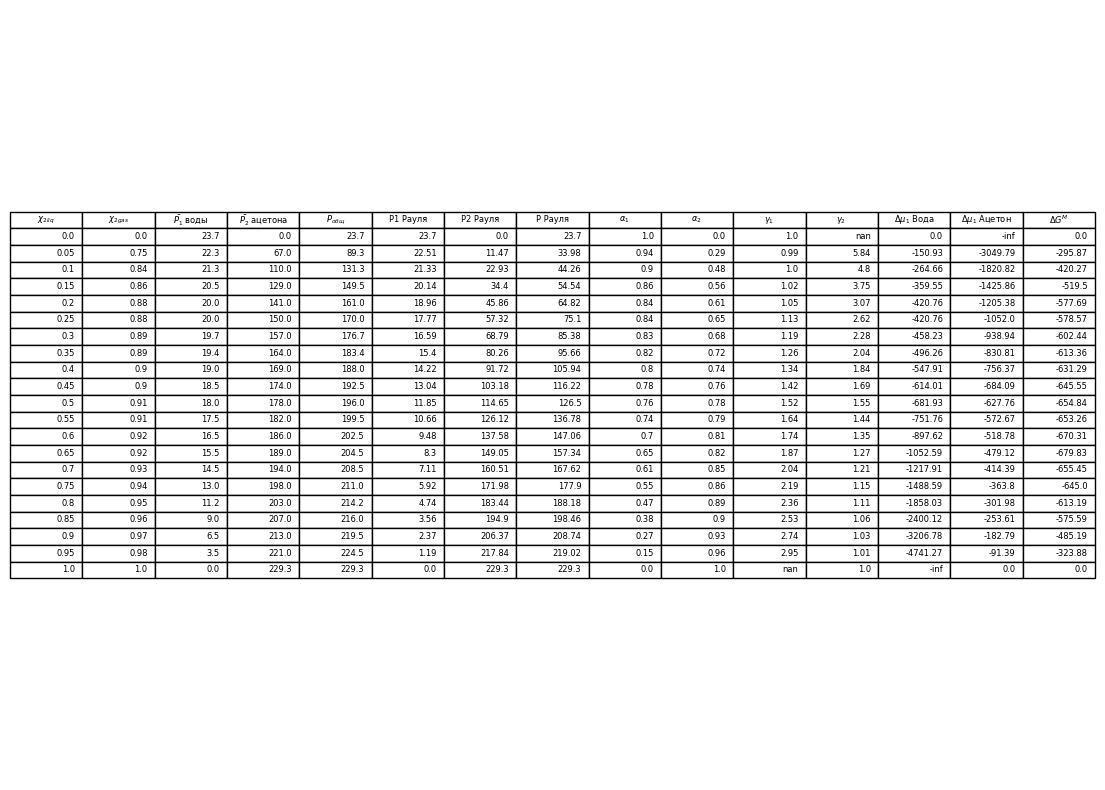

In [161]:
from matplotlib.backends.backend_pdf import PdfPages

#https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
fig, ax =plt.subplots(figsize=(14,10))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df_rounded.values,colLabels=df_rounded.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("Partial Pressure.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()